In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib
from sklearn import cross_validation,metrics
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
import json

import sys
reload(sys)
sys.setdefaultencoding('utf8')

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


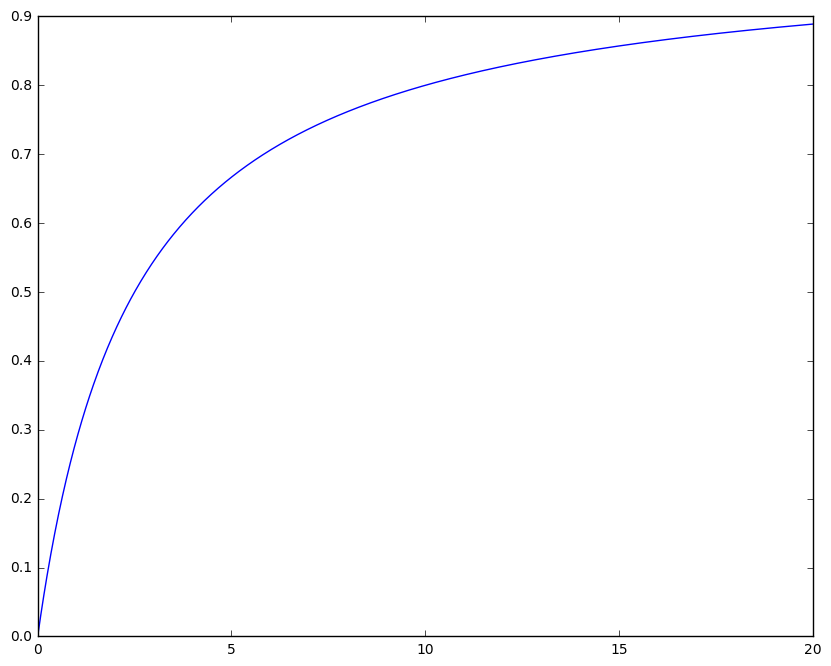

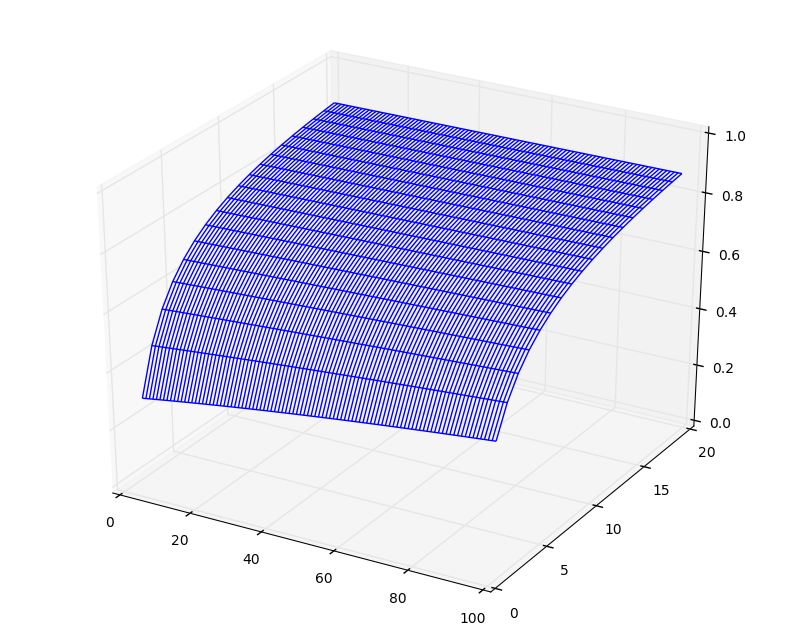

In [92]:
import math

days = np.linspace(0, 30, 100)
x = np.linspace(0, 100, 100)
y = np.linspace(10, 5, 100)

steepness = 0.4

def normalize_score(score):
    score *= steepness
    return score / (1 + score)

def get_score(days_count, points_count):
    point_count_score = points_count
    date_count_score = days_count
    score = 0.01 * point_count_score + 1. * date_count_score
    return normalize_score(score)

def plot(X, fn):
    Y = [fn(x) for x in X]
    plt.plot(X, Y)
    plt.show()


def show3D():
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    day_count = np.arange(1, 20, 1)
    point_count = np.arange(3, 100, 1)
    X, Y = np.meshgrid(day_count, point_count)
    Z = []
    for pc in point_count:
        Z_line = []
        for dc in day_count:
            Z_line.append(get_score(dc, pc))
        Z.append(Z_line)
    Z = np.array(Z)
    ax.set_zlim(0, 1)
    surf = ax.plot_wireframe(Y, X, Z, rstride=1, cstride=1)
    #surf = ax.plot_surface(Y, X, Z, cmap=cm.coolwarm,
    #                       linewidth=0, antialiased=True)
    #fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()

    
plot(np.linspace(0, 20, 1000), normalize_score)
show3D()

In [38]:

import logging

def name2city():
    import json
    res = {}
    for l in open("/Users/liyong/leon/code/repos/user_mining/user_place/trading_area/final_business.json"):
        js = json.loads(l.strip())
        city_name = js['city'].decode('utf8')
        res[js['business_name']] = city_name
    return res

n2c = name2city()

def plot(fname, title, sub, threshold = 100000):
    x0, x1, y0, y1 = [], [], [], []
    idx = 0
    cities = set()
    for l in open(fname):
        f = l.strip().split()
        uc = int(f[1]) 
        if uc > threshold:
            cities.add(n2c[f[0].decode('utf8')])
        (y0 if (uc < threshold) else y1).append(uc)
        (x0 if (uc < threshold) else x1).append(idx)
        idx += 1
    print '-' * 10
    print u'用户量阈值 %dw' % (threshold / 10000)
    print u'城市数量', len(cities)
    print u'商圈数量', len(x1)
    return

    plt.subplot(sub)
    plt.xlim(0, 5500)
    plt.ylim(0, 25*1e4)
    plt.title(title)
    plt.ylabel('user count')
    plt.plot(x0, y0, 'r')
    plt.plot(x1, y1, 'b')

print '!!'
#print plot('百度原始商圈的用户覆盖统计', 'origin business areas', 221)
for i in range(2,11,2):
    plot('百度原始商圈的用户覆盖统计_扩展', 'extended business areas', 222, i * 1e4)
#plt.show()

